In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [24]:
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

# Load Figure 12 Dataset 1
This means only the height is variable.

Datapoint 21963
Label True


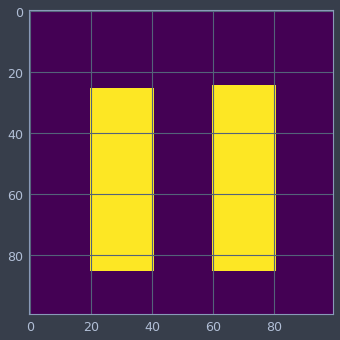

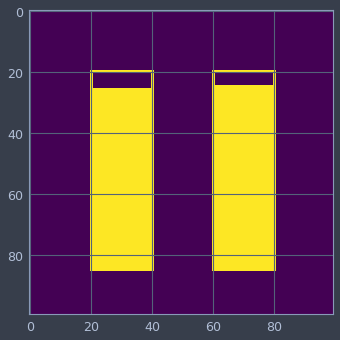

In [4]:
images, framed_images, labels = C.Figure12.load(dataset=1)

# Configure the VGG19 + MLP Classifier

In [28]:
from vgg19 import VGG19

In [6]:
classifier = VGG19()
classifier.setup()

Configured VGG19 (imagenet weights) and a MLP..


In [7]:
#
# Setup the experiment
#
stacked_images = np.stack((images,)*3, -1) # we need RGB channels

X_train = stacked_images[0:80000]
y_train = labels[0:80000]
X_test = stacked_images[80000:]
y_test = labels[80000:]

In [8]:
classifier.train(X_train, y_train)

Generating features for X_train using VGG19..
80000/80000 [==============================] - 220s 3ms/step
Fitting the MLP..
Train on 60000 samples, validate on 20000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 188us/step - loss: 0.0924 - acc: 0.9714 - val_loss: 0.0015 - val_acc: 1.0000


In [9]:
y_pred = classifier.test(X_test, y_test)

Generating features for X_test using VGG19..
20000/20000 [==============================] - 55s 3ms/step
Predict using the MLP..
20000/20000 [==============================] - 1s 51us/step
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      9929
       True       1.00      1.00      1.00     10071

avg / total       1.00      1.00      1.00     20000



### The second experiment (framed)

In [10]:
framed_classifier = VGG19()
framed_classifier.setup()

Configured VGG19 (imagenet weights) and a MLP..


In [11]:
#
# Setup the experiment
#
stacked_framed_images = np.stack((framed_images,)*3, -1) # we need RGB channels

X_train_framed = stacked_framed_images[0:80000]
y_train_framed = labels[0:80000]
X_test_framed = stacked_framed_images[80000:]
y_test_framed = labels[80000:]

In [12]:
framed_classifier.train(X_train_framed, y_train_framed)

Generating features for X_train using VGG19..
80000/80000 [==============================] - 227s 3ms/step
Fitting the MLP..
Train on 60000 samples, validate on 20000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 187us/step - loss: 0.1077 - acc: 0.9634 - val_loss: 0.0111 - val_acc: 1.0000


In [13]:
y_pred_framed = classifier.test(X_test_framed, y_test_framed)

Generating features for X_test using VGG19..
20000/20000 [==============================] - 56s 3ms/step
Predict using the MLP..
20000/20000 [==============================] - 1s 52us/step
             precision    recall  f1-score   support

      False       0.90      0.90      0.90      9929
       True       0.90      0.90      0.90     10071

avg / total       0.90      0.90      0.90     20000



### k-Fold Cross Validation

In [36]:
classifier = VGG19()
classifier.setup()

Configured VGG19 (imagenet weights) and a MLP..


In [23]:
stacked_images = np.stack((images,)*3, -1) # we need RGB channels

In [50]:
classifier.run_kfold(stacked_images, labels, n_splits=2, n_repeats=1, verbose=True, epochs=2)

Train on 37500 samples, validate on 12500 samples
Epoch 1/2
37500/37500 [==============================] - 15s 400us/step - loss: 0.6932 - acc: 0.5013 - val_loss: 0.6932 - val_acc: 0.5001
Epoch 2/2
50000/50000 [==============================] - 5s 96us/step
Train on 37500 samples, validate on 12500 samples
Epoch 1/2
37500/37500 [==============================] - 15s 389us/step - loss: 0.6933 - acc: 0.4970 - val_loss: 0.6931 - val_acc: 0.5001
Epoch 2/2
50000/50000 [==============================] - 5s 96us/step


[{'acc': [0.50125333332379662, 0.49890666666984557],
  'loss': [0.69318321080525713, 0.69316005741755171],
  'test_acc': 0.49856,
  'test_loss': 0.69315467636108397,
  'val_acc': [0.50008000003814701, 0.49992000000953674],
  'val_loss': [0.6931679552078247, 0.6931494001960754]},
 {'acc': [0.49701333333651226, 0.49821333333333334],
  'loss': [0.69331321245193478, 0.69318439405441279],
  'test_acc': 0.50144,
  'test_loss': 0.69314300857543942,
  'val_acc': [0.50007999996185304, 0.49991999999046327],
  'val_loss': [0.69314717300415041, 0.69315144306182863]}]

In [51]:
classifier.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [52]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical
import keras.applications.vgg19

In [54]:
MLP = models.Sequential()
MLP.add(layers.Dense(256, activation='relu', input_dim=3 * 3 * 512))
MLP.add(layers.Dropout(0.5))
MLP.add(layers.Dense(2, activation='softmax'))

# MLP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# history = MLP.fit(X[train], \
#                   to_categorical(y[train]), \
#                   epochs=epochs, \
#                   batch_size=batch_size, \
#                   validation_split=0.25,
#                   verbose=verbose)

In [55]:
MLP.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_355 (Dense)            (None, 256)               1179904   
_________________________________________________________________
dropout_179 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_356 (Dense)            (None, 2)                 514       
Total params: 1,180,418
Trainable params: 1,180,418
Non-trainable params: 0
_________________________________________________________________
